# AILAB + LeNER-BR
This jupyter notebook is being develop to integrate the leNER-BR model described in this [article](https://cic.unb.br/~teodecampos/LeNER-Br/luz_etal_propor2018.pdf) with the AILAB text classification pipeline.  

In [1]:
from ailab_ner.lenerbr.ner_model import NERModel
from ailab_ner.lenerbr.config import Config
from ailab_ner.preprocessing import generate_freq_dist_plot, generate_wordcloud
import pandas as pd
from nltk import word_tokenize
from nltk import data
from nltk.tokenize.punkt import PunktSentenceTokenizer
import sys

### Constants

In [2]:
RELATIVE_PATH_TO_FOLDER = "./assets/datasets/"
DATA_FILENAME = "judicial_data"

## Loadinging raw data

In [3]:
excel_filename = RELATIVE_PATH_TO_FOLDER + DATA_FILENAME + ".csv"
df_raw_data = pd.read_csv(excel_filename)

print(df_raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    661 non-null    int64 
 1   id_documento  661 non-null    int64 
 2   area1         661 non-null    object
 3   tema1         661 non-null    object
 4   subtema1      661 non-null    object
 5   area2         140 non-null    object
 6   tema2         140 non-null    object
 7   subtema2      140 non-null    object
 8   area3         36 non-null     object
 9   tema3         36 non-null     object
 10  subtema3      36 non-null     object
 11  area4         16 non-null     object
 12  tema4         16 non-null     object
 13  subtema4      16 non-null     object
 14  area5         4 non-null      object
 15  tema5         4 non-null      object
 16  subtema5      4 non-null      object
 17  area6         1 non-null      object
 18  tema6         1 non-null      object
 19  subtema6

### Treating data

In [4]:
df_data = pd.DataFrame(data=df_raw_data['body'])
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    661 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB
None


### Sampling data

In [5]:
df_sample = df_data.sample(n=50)
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 37 to 144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes
None


### Data Visualization

In [6]:
print(df_sample.head())

                                                  body
37   idente do Egrégio Tribunal de ContilLSI~   EXA...
653  www.eiroadvogados.com.br Correspondentes:Brasí...
173  1<:  POOER JUOICI,\RIO       FEOERAL JUSTiÇA D...
592  Exmo. Sr. Ministro do Tribunal de Contas da Un...
481  ~ •.T .. 5 m   •.•...     Et:p' f'i9It CONSTRU...


## leNER-BR model

In [7]:
# create instance of config
config = Config()

# build model
model = NERModel(config)
model.build()
model.restore_session(config.dir_model)

tokenizer = PunktSentenceTokenizer()

From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:30: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:110: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:130: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:145: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:150: bidirectional_dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn.py:464: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Please use `layer.add_weight` method instead.


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn_cell_impl.py:958: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.add_weight` method instead.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn_cell_impl.py:962: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn.py:244: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:161: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:221: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:47: The name tf.train.MomentumOptimizer is deprecated. Please use tf.compat.v1.train.MomentumOptimizer instead.

Initializing tf session


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:64: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:65: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:66: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

Reloading the latest trained model...


INFO:tensorflow:Restoring parameters from assets/model_assets/model/prototype_revised/model.weights/


Restoring parameters from assets/model_assets/model/prototype_revised/model.weights/


### Listing entities types and preparing variables

In [8]:
TIPOS_ENTIDADES = ['PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'JURISPRUDENCIA', 'LEGISLACAO']
entities_docs_per_sentence_per_type = dict()
person_docs, jurisprudence_docs, time_docs = [], [], []
legislation_docs, organizations_docs, localizations_docs = [], [], []
count_entidades = dict()

for tipo in TIPOS_ENTIDADES:
    count_entidades[tipo] = 0

docs = df_sample['body'].values

### Using model to identify entities

In [9]:
tokenizer.train(docs)
docs_labels = []
docs_tokenized = []
for doc in docs:
    entitities_in_doc = dict()
    doc_sentences = tokenizer.tokenize(doc)
    label_doc = []
    for sentence in doc_sentences:
        words = word_tokenize(sentence, language='portuguese')
        preds = model.predict(words)
        label_doc.append(preds)
        for i, word in enumerate(words):
            ''' Removendo sufixo de tipo de entidades'''
            if preds[i][0:2] in ['B-', 'I-', 'E-', 'S-']:
                preds[i] = preds[i][2:]
            if preds[i] != 'O':
                ent_type = preds[i]
                count_entidades[ent_type] += 1
                if ent_type not in entitities_in_doc.keys():
                    entitities_in_doc[ent_type] = [word]
                else:
                    entitities_in_doc[ent_type].append(word)
        
    ''' Separando cada bolsa de palavras por tipo de entididade '''
    if 'PESSOA' in entitities_in_doc.keys():
        person_docs.append(" ".join(entitities_in_doc['PESSOA']))
    else:
        person_docs.append(" ")

    if 'JURISPRUDENCIA'  in entitities_in_doc.keys():
        jurisprudence_docs.append(" ".join(entitities_in_doc['JURISPRUDENCIA']))
    else:
        jurisprudence_docs.append(" ")

    if 'TEMPO' in entitities_in_doc.keys():
        time_docs.append(" ".join(entitities_in_doc['TEMPO']))
    else:
        time_docs.append(" ")

    if 'LEGISLACAO'  in entitities_in_doc.keys():
        legislation_docs.append(" ".join(entitities_in_doc['LEGISLACAO']))
    else:
        legislation_docs.append(" ")

    if 'ORGANIZACAO'  in entitities_in_doc.keys():
        organizations_docs.append(" ".join(entitities_in_doc['ORGANIZACAO']))
    else:
        organizations_docs.append(" ")

    if 'LOCAL'  in entitities_in_doc.keys():
        localizations_docs.append(" ".join(entitities_in_doc['LOCAL']))
    else:
        localizations_docs.append(" ")

    docs_labels.append(label_doc)
    docs_tokenized.append(doc_sentences)

### Printing text with entities

In [16]:
bcolors = {
    "PESSOA": '\033[94m',
    "TEMPO": '\033[92m',
    "LOCAL": '\033[93m',
    "ORGANIZACAO": '\033[91m',
    "JURISPRUDENCIA": '\033[35m',
    "LEGISLACAO": '\033[36m',
    "ENDC": '\033[0m',
    "O": ""
}

for entities_sentences, sentences in zip(docs_labels[:2], docs_tokenized[:2]):
    for preds, sentence in zip(entities_sentences[:100], sentences[:100]):
        words = word_tokenize(sentence, language='portuguese')
        for index, word in enumerate(words):
            print(bcolors[preds[index]] +
                word + bcolors["ENDC"], end=' ')
        print()
    print()

idente do Egrégio Tribunal de ContilLSI~ EXAME PRtvlo DO EDITAL 000452 856361 hs . ' 
Ref : Pregão Presenciai n° 01/2011 PROCESSO : N° 159/2010 OBJETO : Contratação de empresa de seguro saúde para prestação de serviços de assistência médico-hospitalar , conforme quantidades e especificações constantes do ANEXO 1- TERMO DE REFERENCIA . 
Fabiana do Nascimento Santana , inscrita no cadastro de pessoa fisica sob o CPF n0228.481.638-01 , estudante do ensino superior , portadora da cédula de identidade RG n ' 40.823.863-5 , residência na Rua Nova 8rasllia n0572 , Jardim Grimaldi - CEP : 03924-040 , vem respeitosamente , á elevada presença de Vossa Senhoria , com fundamento no parágrafo l ' do artigo 113 da lei 6666/93 , ingressar com a presente REPRESENTACAo COM PEDIDO DE LIMINAR , em face do edital do Pregão 0112011 , processo 15912010 do CEAGESP- Companhia de Entrepostos e Armazéns Gerais de São Paulo , pelas razões de fato e de direito a seguir aduzidas . 
DO OBJETIVO Afastar do presente 

Conforme documentação em anexo , a Representante foi HABILITADA EM TODAS AS FASES DO CERTAME , uma vez que APRESENTOU TODAS AS DOCUMENTAÇÕES NECESSÁRIAS , demonstrou possuir SOLVÊNCIA FINANCEIRA e PATRIMONIAL , além de ter apresentado a MELHOR e MAIS BARATA PROPOSTA para a execução do contrato , uma vez que a Representante apresentou o preço de R $ 10.650.004,01 ( Dez Milhões , Seiscentos e Cinquenta Mil , Quatro Reais e Um Centavo ) e , conforme ' . '' '' 
Página 1 de 15 li .~l ! J Av . 
Almirante Wandenkolk , 266 - Umarizal li : ~ . 
' 7 ' : CEPo66.055-030 - Belém - Pará - Brasil . 
. 
Fone/Fax : + 55 91 3223-4466 - 3242-86 3 ... , . , . 
. 
. 
.. 
E-mai ! 
: marcoseiro @ gmail.com Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 58637287. www.eiroadvogados.com.br Correspondentes : Brasília . 
São Paulo o EDITAL , trata-se de uma CONCORRÊNCIA por MENOR PREÇO GLOBAL do serviço contratado , o que foi devidamente cumprido pela Representante . 
3 

Além disso a Representante teve a MELHOR PROPOSTA , já que se trata de uma LICITAÇÃO DE MENOR PREÇO GLOBAL , conforme o Edital , o que por si só já VIOLA o artigo 3° da Lei Federal N° 8.666/93 , que trata da selecão da proposta mais vantajosa para o poder público . 
21 . 
A Licitação constitui-se no procedimento administrativo mediante o qual a Administração Pública seleciona a proposta mais vantajosa para o contrato de interesse público , desenvolvendo-se através de sucessões ordenadas de atos vinculantes para a Administração e para os licitantes . 
Tanto que , o próprio REGULAMENTO DO SEBRAE para Licitações e Contrato consagra em seu Art . 
2° o destino e objetivo da Licitação pelo Sistema Sebrae pela PROPOSTA MAIS VANTAJOSA , o que NÃO EXPLICA O REPRESENTADO ESCOLHER COMO VENCEDORA UMA PROPOSTA R $ 514.892,20 ( QUINHENTOS E CATORZE MIL , OITOCENTOS E NOVENTA E DOIS REAIS E VINTE CENTAVOS ) MAIS CARA E DISPENDIOSA QUE A DA REPRESENTANTE e , AINDA HOMOLOGAR E ADJUDICAR À LICITAÇÃO EM 

## Analysing entities found

In [11]:
df_sample['PESSOA'] = person_docs
df_sample['TEMPO'] = time_docs
df_sample['LOCAL'] = localizations_docs
df_sample['ORGANIZACAO'] = organizations_docs
df_sample['JURISPRUDENCIA'] = jurisprudence_docs
df_sample['LEGISLACAO'] = legislation_docs

In [12]:
for tipo in TIPOS_ENTIDADES:
    print("Quantidade de entidades encontradas do tipo: " + tipo + " - " + str(count_entidades[tipo]))

Quantidade de entidades encontradas do tipo: PESSOA - 12385
Quantidade de entidades encontradas do tipo: TEMPO - 21485
Quantidade de entidades encontradas do tipo: LOCAL - 14015
Quantidade de entidades encontradas do tipo: ORGANIZACAO - 45884
Quantidade de entidades encontradas do tipo: JURISPRUDENCIA - 2514
Quantidade de entidades encontradas do tipo: LEGISLACAO - 33576


Entidades do tipo: body
.       145566
,       122972
de       70429
/        53282
-        45490
:        45352
e        33685
a        29812
o        26082
do       24869
da       21204
1        18643
(        16060
)        14231
que      13480
com      12628
em       12090
2        11620
'        11357
no       10570
para     10239
as        9551
~         9266
3         9066
DE        8831
dtype: int64


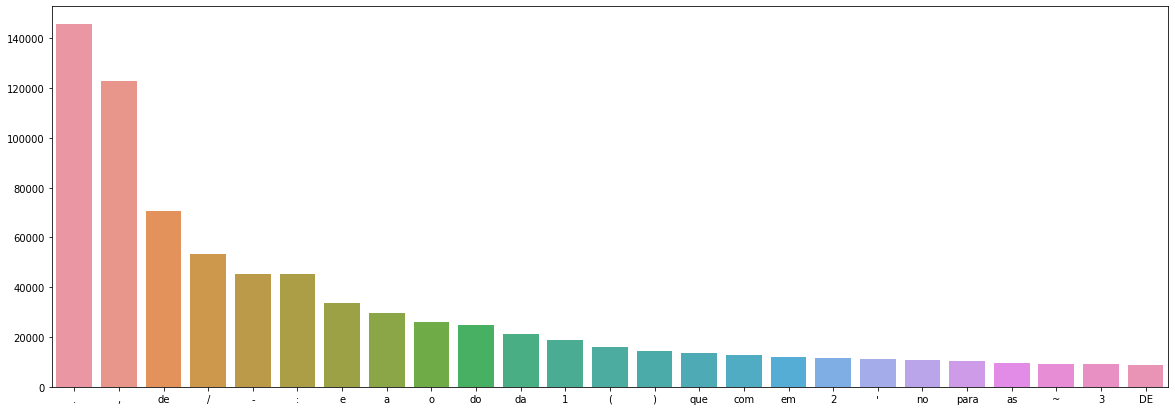

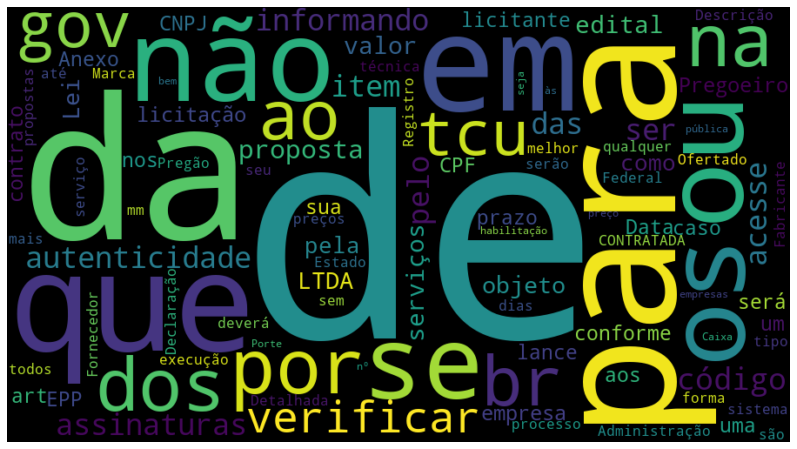

Entidades do tipo: PESSOA
de           362
DE           266
.            186
da           153
José         143
Bruno        126
Alves        111
PEREIRA      102
DA           101
-            100
&             99
Oliveira      87
Lopes         86
Guilherme     84
SILVA         83
Rua           82
Fernandes     82
BARBOSA       81
Silva         81
JORGE         81
Santos        75
Pires         74
LOPES         73
Gomes         73
Barbosa       72
dtype: int64


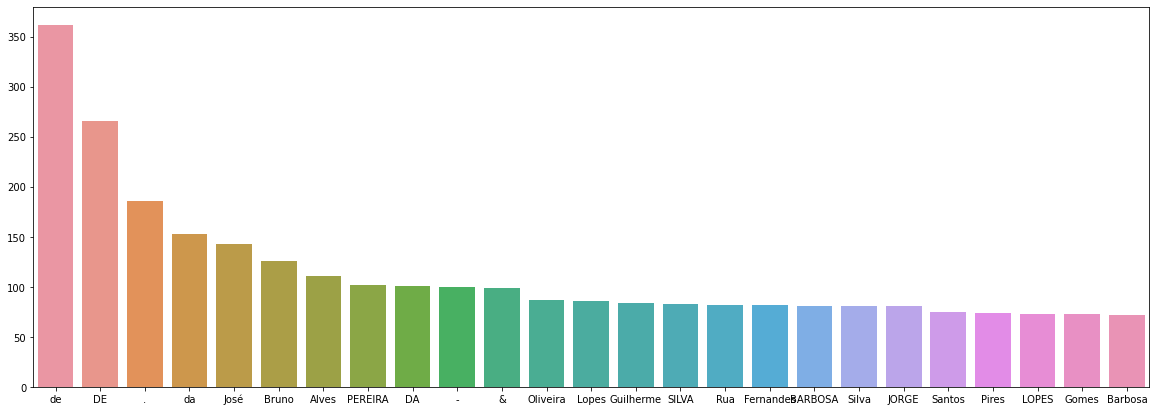

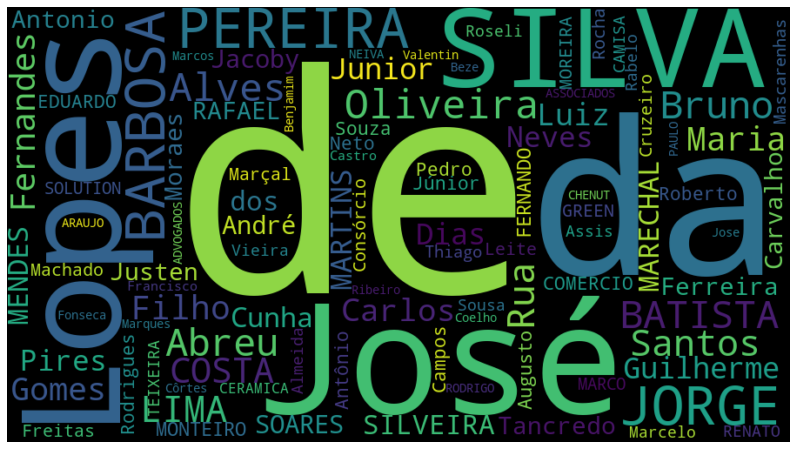

Entidades do tipo: TEMPO
/       18252
2013     5450
09       5362
11       3133
de       2598
2014      986
2016      971
10        971
12        967
.         904
2012      795
20        590
2015      554
01        489
13        480
26        436
07        423
19        420
05        416
7         393
17        377
,         375
18        355
08        353
6         338
dtype: int64


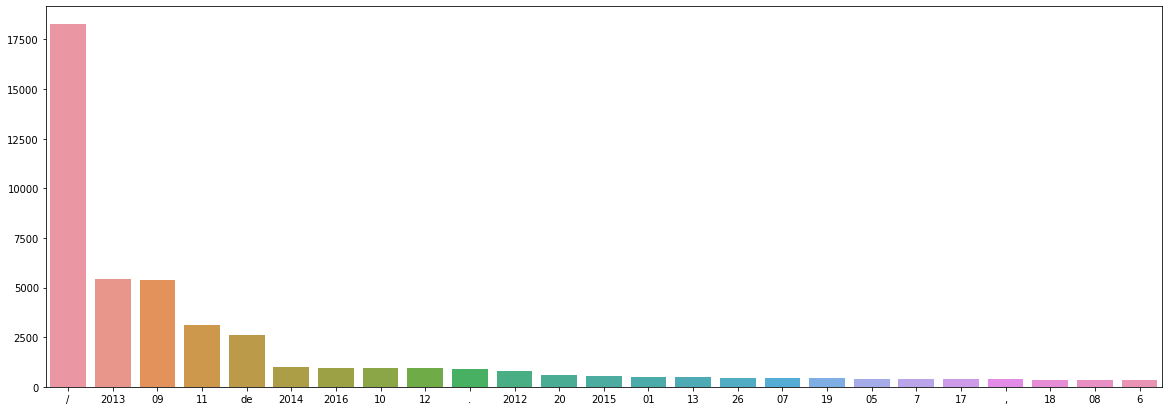

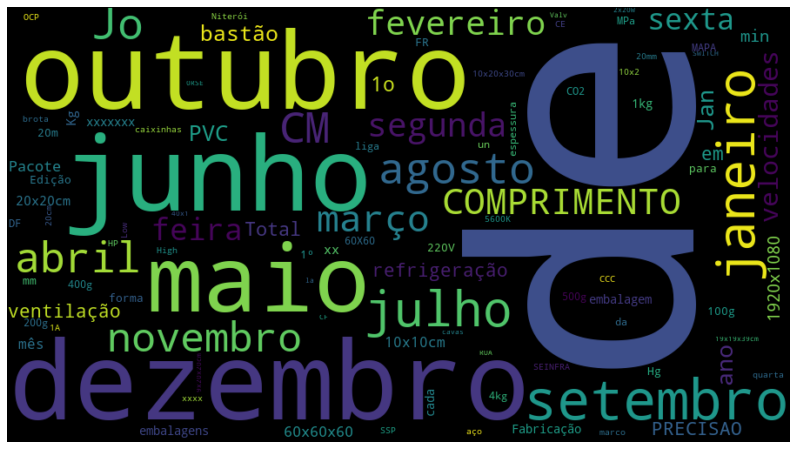

Entidades do tipo: LOCAL
de          631
-           608
/           456
Rua         454
São         370
DF          359
Paulo       352
Brasília    304
do          295
LTDA        291
Rio         263
.           258
:           217
SP          216
Bairro      208
Janeiro     191
Brasil      182
SUL         179
DE          167
Sul         163
MG          143
BRASIL      140
PVC         137
Jardim      135
Marca       135
dtype: int64


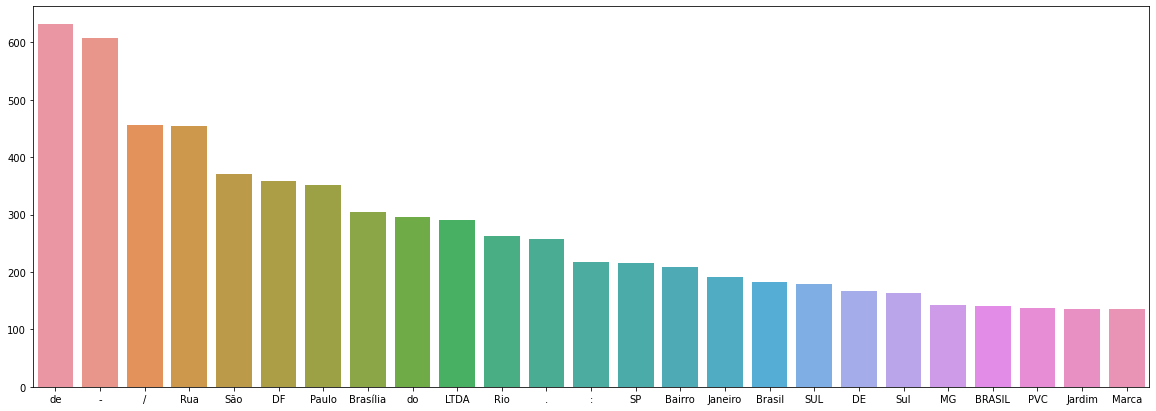

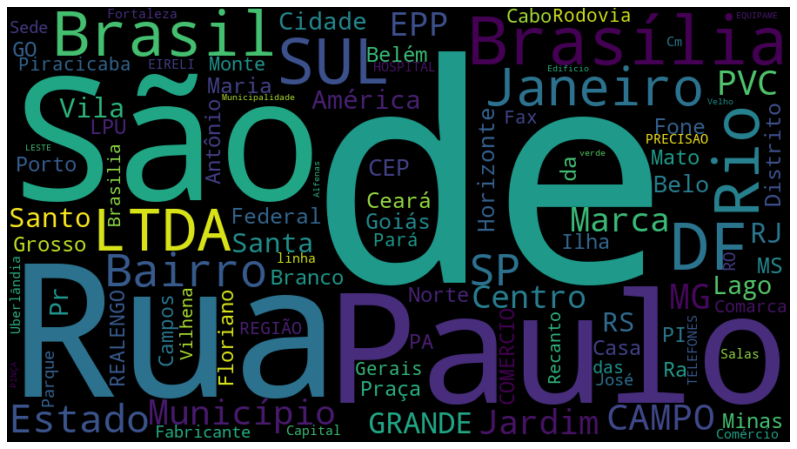

Entidades do tipo: ORGANIZACAO
de            2852
LTDA          2329
DE            1548
do            1041
E              933
/              907
da             894
CIA            886
e              761
-              735
Federal        638
TCU            474
União          467
:              458
EDUCAÇÃO       425
DO             423
Secretaria     415
.              403
Ministério     389
A              384
DA             375
Tribunal       366
S              366
INSTITUTO      365
COMERCIO       364
dtype: int64


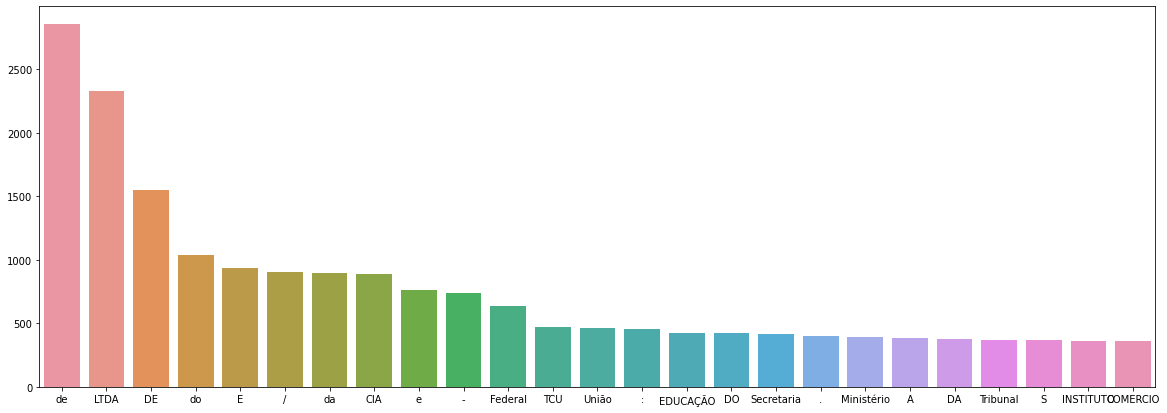

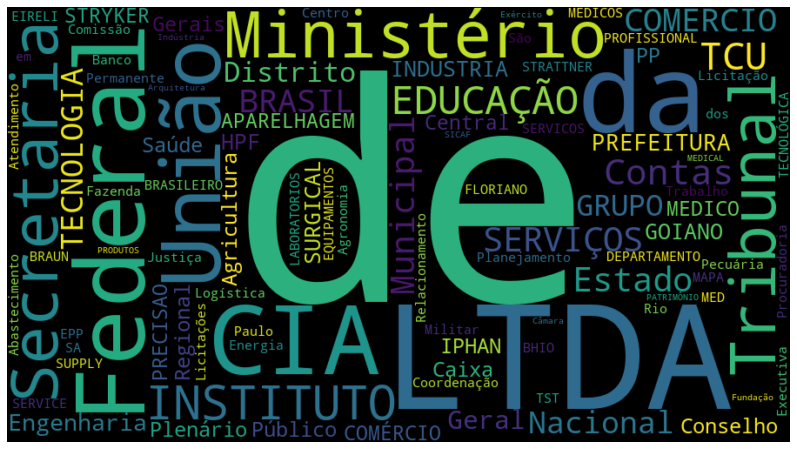

Entidades do tipo: JURISPRUDENCIA
.           705
/           671
-           351
n           261
°           258
Acórdão     203
1           103
2            83
2013         66
N            61
Plenário     60
2010         52
Processo     46
2003         42
2007         40
TC           39
2009         38
5            37
3            35
214          33
2012         29
02           29
2015         28
0001         27
Decisão      26
dtype: int64


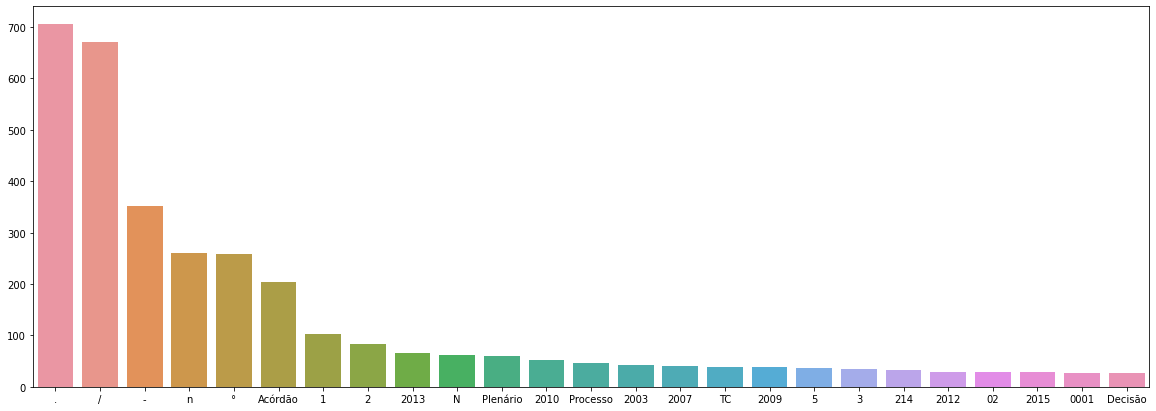

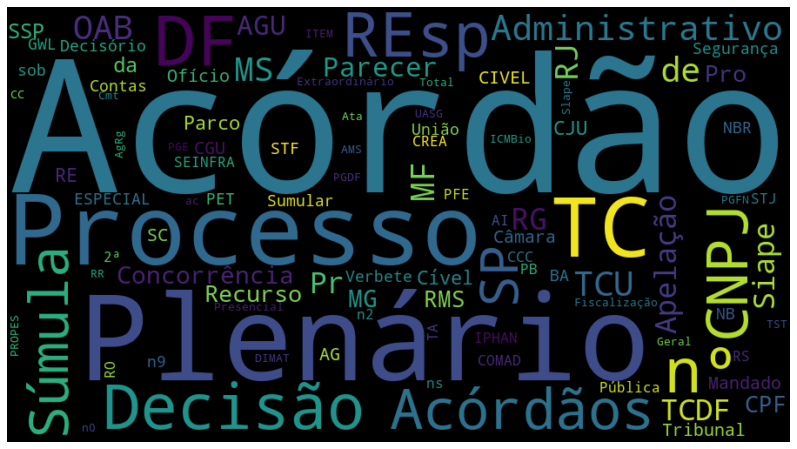

Entidades do tipo: LEGISLACAO
.          4963
,          3128
Lei        2221
/          2155
da         1828
n          1750
°          1697
8          1233
do         1001
666         963
de          718
93          620
artigo      602
000         575
1           522
e           480
Decreto     449
2           422
3           414
nº          408
10          404
Federal     390
-           388
7           363
inciso      345
dtype: int64


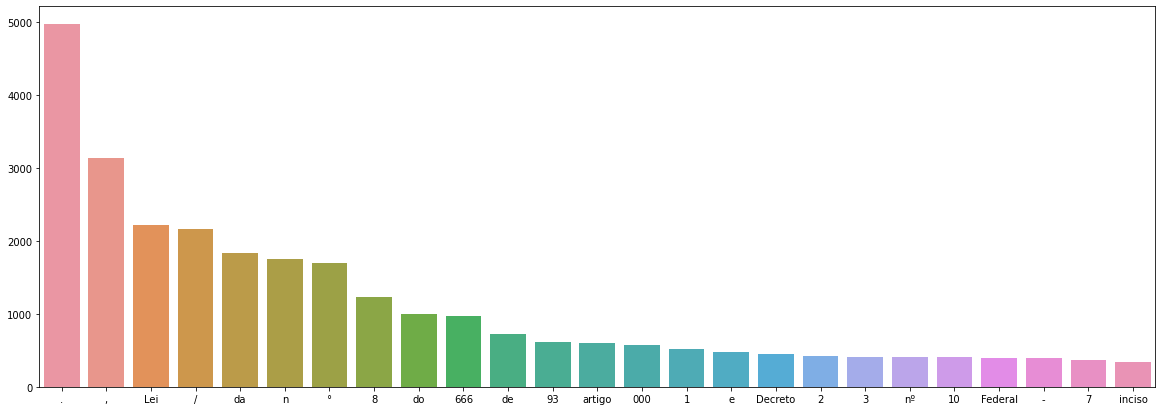

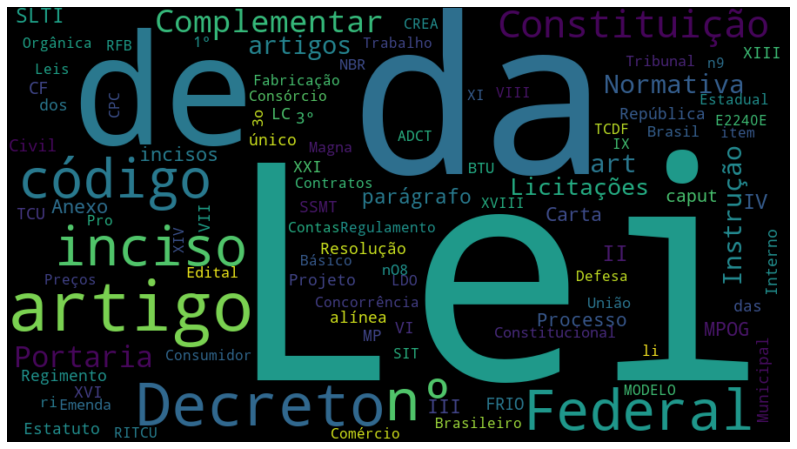

In [17]:
for column in df_sample.columns:
    print("Entidades do tipo: " + column)
    print(generate_freq_dist_plot(df_sample[column]))
    generate_wordcloud(df_sample[column])

### Storing entities found

In [14]:
"""  Let"s store the data """
excel_filename = RELATIVE_PATH_TO_FOLDER + DATA_FILENAME + "_treated.xlsx"

In [15]:
"""  Convert the dataframe to an xlsx file """
df_sample.to_excel(excel_filename)

print("Stored tread dataset on ", excel_filename)

Stored tread dataset on  ./assets/datasets/judicial_data_treated.xlsx
